# Data Analysis

## Investigation Overview

In this investigation, We wanted to look at different relationships and trends in data.

## Dataset Overview

In this dataset, there are 6 tables (orders, order_products_prior, order_products_train, products, departments, aisles). The dataset contains total 3421083 unique orders, 206209 unique users, 49688 unique products, 21 unique departments and 134 uniques aisles.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

## Loading Data

In [2]:
order_df=pd.read_csv('orders.csv')
products_df=pd.read_csv('products.csv')
order_product_prior_df=pd.read_csv('order_products__prior.csv')
order_product_train_df=pd.read_csv('order_products__train.csv')
department_df=pd.read_csv('departments.csv')
aisle_df=pd.read_csv('aisles.csv')

# Tables

# Orders

In [3]:
order_df.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [4]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [5]:
order_df.order_id.nunique()

3421083

In [6]:
order_df.user_id.nunique()

206209

In [7]:
order_df.order_id.duplicated().sum()

0

In [8]:
order_df.order_id.value_counts()

4094       1
2372051    1
3273579    1
3269481    1
3248999    1
          ..
1706475    1
1710569    1
1731047    1
1735141    1
4098       1
Name: order_id, Length: 3421083, dtype: int64

# Products

In [9]:
products_df.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [10]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
products_df.product_id.nunique()

49688

In [12]:
products_df.product_id.duplicated().sum()

0

# Order_products_prior

In [13]:
order_product_prior_df.head(15)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [14]:
order_product_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [15]:
order_product_prior_df.order_id.nunique()

3214874

In [16]:
order_product_prior_df.order_id.duplicated().sum()

29219615

In [17]:
products_df[products_df.product_id==27740]

,product_id,product_name,aisle_id,department_id
27739,27740,Chocolate Love Bar,45,19


# Order_products_train

In [18]:
order_product_train_df.head(15)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


# Department

In [19]:
department_df.head(15)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [20]:
department_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [21]:
department_df.department_id.nunique()

21

# Aisle

In [22]:
aisle_df.head(15)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [23]:
aisle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [24]:
aisle_df.aisle_id.nunique()

134

## Joining Data

In [25]:
order_prior_df=order_df

In [26]:
# Analysis on only prior data
order_prior_df.drop(order_prior_df[order_prior_df.eval_set=="train"].index,inplace=True)

In [27]:
order_prior_df.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [28]:
# Merging order_df and order_products_prior_df
df=pd.merge(order_prior_df,order_product_prior_df,on='order_id')

In [29]:
# Merging info related to products
#df=pd.merge(df,products_df[['product_id','product_name']],on='product_id')
df=pd.merge(df,products_df,on='product_id')

In [30]:
df=pd.merge(df,department_df,on='department_id')
df=pd.merge(df,aisle_df,on='aisle_id')

In [31]:
df.sort_values(by=['user_id','order_number'],inplace=True)

In [32]:
df.set_index('user_id',inplace=True)

In [33]:
df.head(50)

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
user_id,,,,,,,,,,,,,,
1,2539329,prior,1,2,8,NaN,196,1,0,Soda,77,7,beverages,soft drinks
1,2539329,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,dairy eggs,soy lactosefree
1,2539329,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,snacks,popcorn jerky
1,2539329,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,snacks,popcorn jerky
1,2539329,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,household,paper goods
1,2398795,prior,2,3,7,15.0,196,1,1,Soda,77,7,beverages,soft drinks
1,2398795,prior,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,snacks,popcorn jerky
1,2398795,prior,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,snacks,popcorn jerky
1,2398795,prior,2,3,7,15.0,10258,2,0,Pistachios,117,19,snacks,nuts seeds dried fruit


# Joined Data

In [34]:
test=df.groupby(['user_id','order_id','product_id'])
test.first()

eval_set  order_number  order_dow  \
user_id order_id product_id                                     
1       431534   196           prior             5          4   
                 10258         prior             5          4   
                 10326         prior             5          4   
                 12427         prior             5          4   
                 13176         prior             5          4   
...                              ...           ...        ...   
206209  3154581  40396         prior             1          3   
                 40534         prior             1          3   
                 41213         prior             1          3   
        3186442  6187          prior             6          0   
                 14197         prior             6          0   

                             order_hour_of_day  days_since_prior_order  \
user_id order_id product_id                                              
1       431534   196                        15                    28.0   
                 10258                      15                    28.0   
                 10326                      15                    28.0   
                 12427                      15                    28.0   
                 13176                      15                    28.0   
...                                        ...                     ...   
206209  3154581  40396                      11                     NaN   
                 40534                      11                     NaN   
                 41213                      11                     NaN   
        3186442  6187                       16                     3.0   
                 14197                      16                     3.0   

                             add_to_cart_order  reordered  \
user_id order_id product_id                                 
1       431534   196                         1          1   
                 10258                       3          1   
                 10326                       5          0   
                 12427                       2          1   
                 13176                       8          1   
...                                        ...        ...   
206209  3154581  40396                       4          0   
                 40534                       6          0   
                 41213                       3          0   
        3186442  6187                        2          1   
                 14197                       1          0   

                                                      product_name  aisle_id  \
user_id order_id product_id                                                    
1       431534   196                                          Soda        77   
                 10258                                  Pistachios       117   
                 10326                         Organic Fuji Apples        24   
                 12427                         Original Beef Jerky        23   
                 13176                      Bag of Organic Bananas        24   
...                                                            ...       ...   
206209  3154581  40396                                   Guacamole        67   
                 40534       In Rich Tomato Sauce Vegetarian Beans        59   
                 41213                                 French Loaf       112   
        3186442  6187                           Raisin Bran Cereal       121   
                 14197                                Tomato Paste         9   

                             department_id       department  \
user_id order_id product_id                                   
1       431534   196                     7        beverages   
                 10258                  19           snacks   
                 10326                   4          produce   
                 12427                  19           snacks   
      

# Exploratory Data Analysis

# Orders

## Total orders in each hour

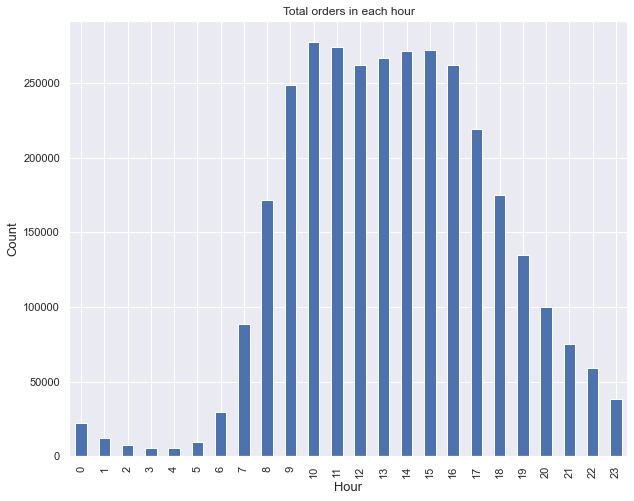

In [35]:
lt = pd.value_counts(order_df['order_hour_of_day']).sort_values().sort_index().plot.bar();
lt.figure.set_size_inches(10, 8)
lt.set(title = 'Total orders in each hour')
lt.set_xlabel('Hour', fontsize = '13')
lt.set_ylabel('Count', fontsize = '13')
plt.show()

## Average number of days after which the order is placed

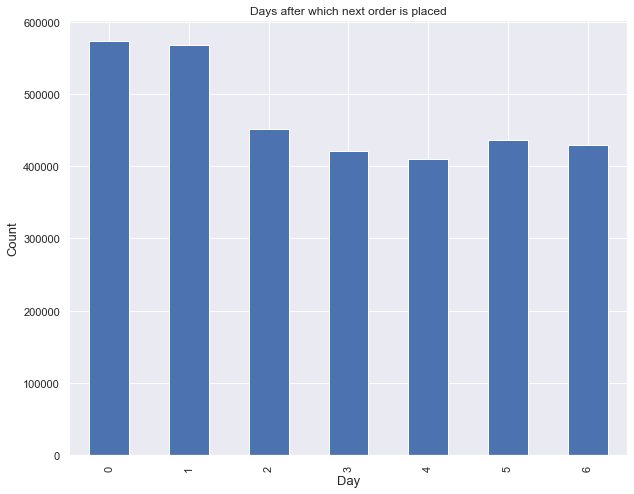

In [37]:
lt = pd.value_counts(order_df['order_dow']).sort_values().sort_index().plot.bar()
lt.figure.set_size_inches(10, 8)
lt.set(title = 'Days after which next order is placed')
lt.set_xlabel('Day', fontsize = '13')
lt.set_ylabel('Count', fontsize = '13')
plt.show()

## Number of times a product is being reordered by a user

In [38]:
mergedDf = order_df.merge(order_product_prior_df, left_on='order_id', right_on='order_id')

In [39]:
pd.pivot_table(mergedDf, index=["user_id"], values = ["product_id","reordered"], aggfunc=lambda x: x.sum())

,product_id,reordered
user_id,,
1,1055272,41
2,4952613,93
3,2416413,55
4,419448,1
5,832990,14
...,...,...
206205,919199,8
206206,7902595,135
206207,6027608,131


## List of products for each user

In [40]:
pd.pivot_table(mergedDf, index=["user_id"], values = ["product_id"], aggfunc=lambda x: list(set(list(x))))

,product_id
user_id,
1,"[17122, 196, 26405, 14084, 46149, 26088, 13032..."
2,"[45066, 2573, 18961, 1559, 32792, 23, 22559, 1..."
3,"[17668, 44683, 48523, 21903, 14992, 21137, 324..."
4,"[21573, 17769, 35469, 43704, 37646, 1200, 1186..."
5,"[28289, 11777, 40706, 48775, 20754, 6808, 1398..."
...,...
206205,"[20995, 21137, 22035, 21910, 17691, 31404, 210..."
206206,"[16896, 44033, 18434, 16387, 21508, 45573, 102..."
206207,"[20995, 18441, 45578, 47626, 33806, 22035, 235..."


## Number of unique product ordered by a user

In [41]:
num_prod = pd.pivot_table(mergedDf, index=["user_id"], values = ["product_id"], aggfunc=lambda x: len(list(set(list(x))))).reset_index()
num_prod.sort_values("product_id",ascending=False).head(20)

,user_id,product_id
182400,182401,726
75303,75304,689
151993,151994,643
152143,152144,616
31309,31310,611
116570,116571,608
143960,143961,573
185079,185080,570
181208,181209,570
106160,106161,557


## Average number of products ordered by a user

In [42]:
num_prod["product_id"].mean()

64.53623750660738

# Products

## Most ordered Products

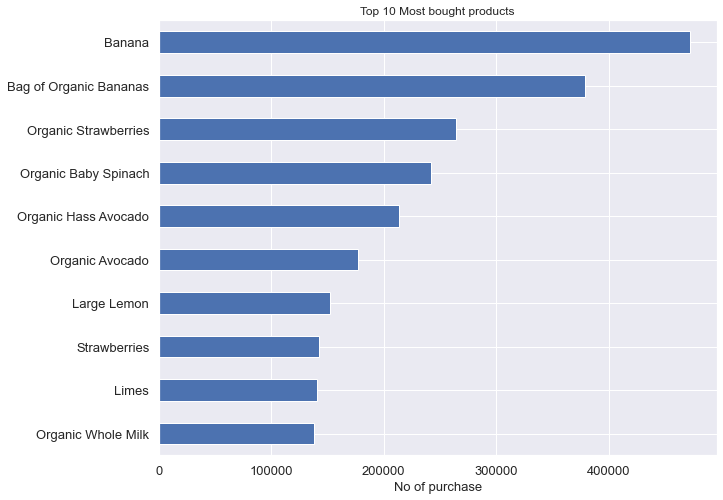

In [43]:
lt = df.product_name.value_counts()[9::-1].plot.barh(fontsize = 13)
lt.set(title = 'Top 10 Most bought products')
lt.set_xlabel('No of purchase', fontsize = '13')
lt.figure.set_size_inches(10, 8)
plt.show()

## Most popular department

In [38]:
df.department.value_counts()[10::-1]

household           738666
dry goods pasta     866627
deli               1051249
canned goods       1068058
bakery             1176787
pantry             1875577
frozen             2236432
beverages          2690129
snacks             2887550
dairy eggs         5414016
produce            9479291
Name: department, dtype: int64

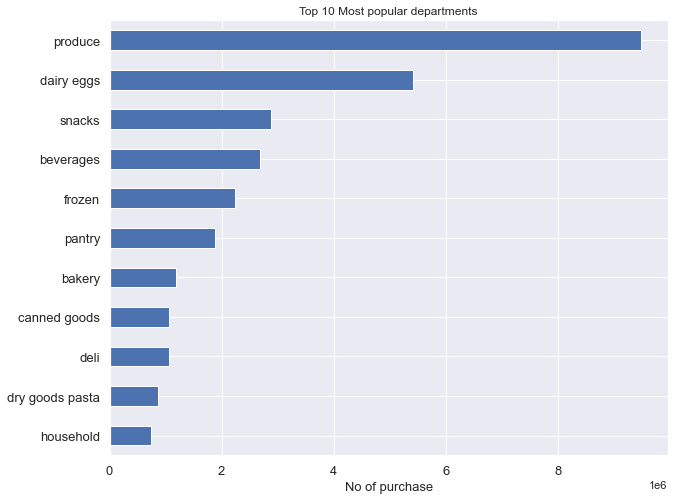

In [40]:
lt = df.department.value_counts()[10::-1].plot.barh(fontsize = 13)
lt.set(title = 'Top 10 Most popular departments')
lt.set_xlabel('No of purchase', fontsize = '13')
lt.figure.set_size_inches(10, 8)
plt.show()

In [45]:
 df.aisle.value_counts()[10::-1]

refrigerated                      575881
bread                             584834
soy lactosefree                   638253
chips pretzels                    722470
water seltzer sparkling water     841533
milk                              891015
packaged cheese                   979763
yogurt                           1452343
packaged vegetables fruits       1765313
fresh vegetables                 3418021
fresh fruits                     3642188
Name: aisle, dtype: int64

## Most popular aisle

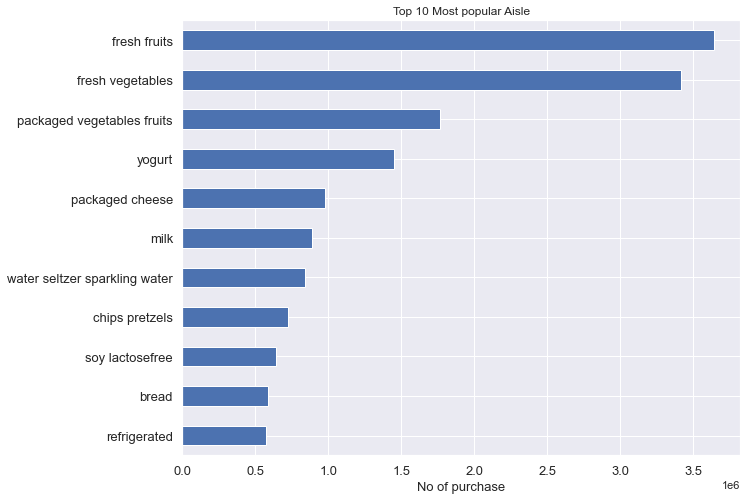

In [46]:
lt = df.aisle.value_counts()[10::-1].plot.barh(fontsize = 13)
lt.set(title = 'Top 10 Most popular Aisle')
lt.set_xlabel('No of purchase', fontsize = '13')
lt.figure.set_size_inches(10, 8)
plt.show()

## Reordering Probability

In [47]:
totalOrderPerProduct=df.groupby('product_id')['order_id'].count()
totalReorderedProduct=df.groupby('product_id')['reordered'].sum()

In [48]:
reordered_df=pd.merge(totalOrderPerProduct,totalReorderedProduct,left_index=True,right_index=True)

In [49]:
reordered_df=pd.merge(reordered_df,products_df[['product_id','product_name']],left_index=True,right_on='product_id')
reordered_df=reordered_df.drop('product_id',axis=1)

In [50]:
reordered_df['Probability']=reordered_df.reordered/reordered_df.order_id
reordered_df=reordered_df.sort_values('Probability',ascending=False)

In [53]:
reordered_df.rename(columns={'order_id':'total_order'},inplace=True)

In [54]:
reordered_df

,total_order,reordered,product_name,Probability
6432,68,64,Raw Veggie Wrappers,0.941176
2074,87,81,Serenity Ultimate Extrema Overnight Pads,0.931034
43552,13,12,Orange Energy Shots,0.923077
27739,101,93,Chocolate Love Bar,0.920792
14608,35,32,Soy Powder Infant Formula,0.914286
...,...,...,...,...
38922,6,0,Sd All Purpose Scouring Pad,0.000000
46233,6,0,Tummy Ache Natural Relief Quick-Dissolving Tab...,0.000000
19863,20,0,Volumizing Conditioner,0.000000
4326,7,0,Organic Total Body Cleanse,0.000000


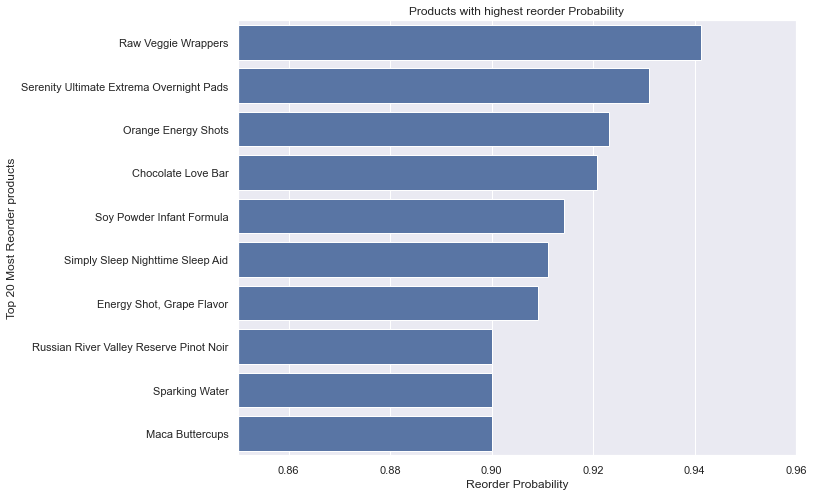

In [42]:
plt.figure(figsize=(10, 8));
sns.barplot(reordered_df.Probability[:10], reordered_df.product_name[:10],color="b");
plt.xlabel('Reorder Probability');
plt.ylabel('Top 20 Most Reorder products');
plt.title('Products with highest reorder Probability');
plt.xlim([0.85,0.96]);

## Days Since Prior Order

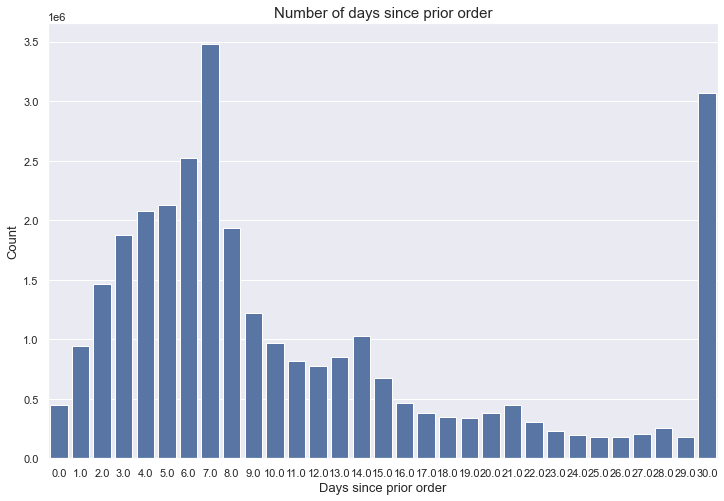

In [100]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=df,color="b")
plt.ylabel('Count', fontsize=13)
plt.xlabel('Days since prior order', fontsize=13)
plt.title("Number of days since prior order", fontsize=15)
plt.show()

## Average Days before Reorder for each product

In [73]:
avgDaysForReorder = df[df.reordered==1].groupby('product_id')['days_since_prior_order'].mean()
reorderDays_df=pd.merge(avgDaysForReorder,products_df[['product_id','product_name']],left_index=True,right_on='product_id')
reorderDays_df=reorderDays_df.drop('product_id',axis=1)
reorderDays_df

,days_since_prior_order,product_name
0,8.915493,Chocolate Sandwich Cookies
1,7.583333,All-Seasons Salt
2,9.975369,Robust Golden Unsweetened Oolong Tea
3,14.517007,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,13.666667,Green Chile Anytime Sauce
...,...,...
49683,28.000000,"Vodka, Triple Distilled, Twist of Vanilla"
49684,14.000000,En Croute Roast Hazelnut Cranberry
49685,7.928571,Artisan Baguette
49686,14.000000,Smartblend Healthy Metabolism Dry Cat Food


## Distribution 

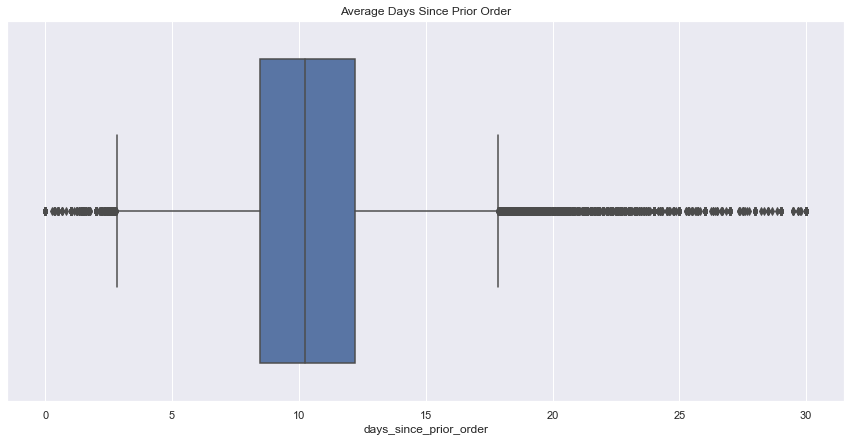

In [74]:
plt.figure(figsize=(15,7))
sns.boxplot(x=reorderDays_df.days_since_prior_order);
plt.title("Average Days Since Prior Order");

In [83]:
reorderDays_df[(reorderDays_df.days_since_prior_order >5 ) & (reorderDays_df.days_since_prior_order < 15)]

,days_since_prior_order,product_name
0,8.915493,Chocolate Sandwich Cookies
1,7.583333,All-Seasons Salt
2,9.975369,Robust Golden Unsweetened Oolong Tea
3,14.517007,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,13.666667,Green Chile Anytime Sauce
...,...,...
49681,7.868421,California Limeade
49682,11.429605,Cucumber Kirby
49684,14.000000,En Croute Roast Hazelnut Cranberry
49685,7.928571,Artisan Baguette


## Average Number of Products in an Order

In [91]:
avgProductsInOrder = df.groupby('order_id')['product_id'].count()

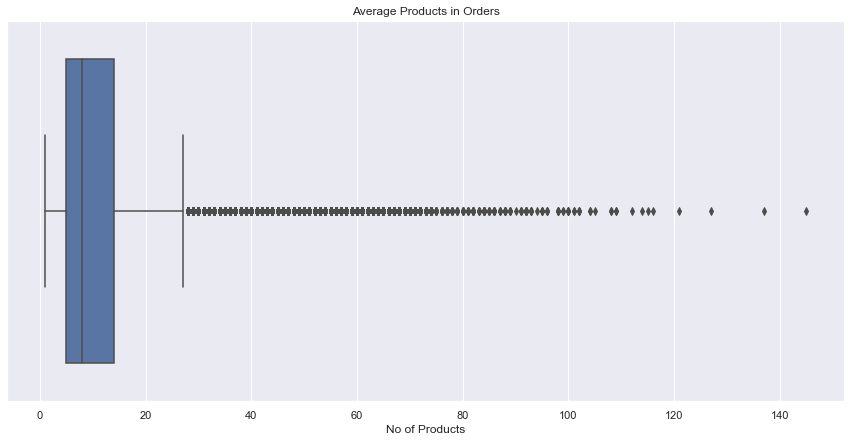

In [95]:
plt.figure(figsize=(15,7))
sns.boxplot(x=avgProductsInOrder);
plt.title("Average Products in Orders");
plt.xlabel('No of Products');